<h1>Scalogram using Continues Wavelet Transform<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Predefined-example-script" data-toc-modified-id="Predefined-example-script-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predefined example script</a></span></li><li><span><a href="#Gauss-wavelet" data-toc-modified-id="Gauss-wavelet-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gauss wavelet</a></span><ul class="toc-item"><li><span><a href="#Default-parameter-setting" data-toc-modified-id="Default-parameter-setting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Default parameter setting</a></span></li><li><span><a href="#with-custom-setting" data-toc-modified-id="with-custom-setting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>with custom setting</a></span></li><li><span><a href="#Show-wavelets-in-time-and-frequency-domain" data-toc-modified-id="Show-wavelets-in-time-and-frequency-domain-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Show wavelets in time and frequency domain</a></span></li></ul></li><li><span><a href="#Other-wavelets" data-toc-modified-id="Other-wavelets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Other wavelets</a></span></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Documentation</a></span></li></ul></div>

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import spkit as sp
print('spkit-version ', sp.__version__)

spkit-version  0.0.9.4


In [5]:
#from sp.cwt import ScalogramCWT
#from sp.cwt import compare_cwt_example

## Data

shape  (2048,) (2048,)


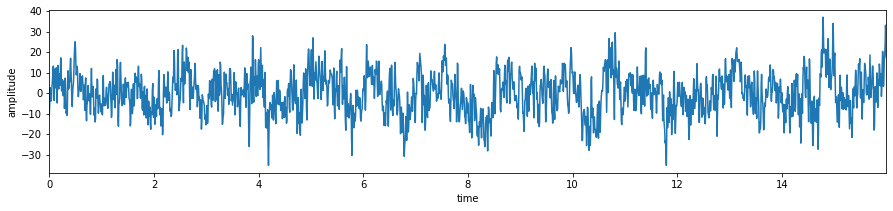

In [7]:
x,fs = sp.load_data.eegSample_1ch()
t = np.arange(len(x))/fs

print('shape ',x.shape, t.shape)

plt.figure(figsize=(15,3))
plt.plot(t,x)
plt.xlim([0,t[-1]])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

## Predefined example script

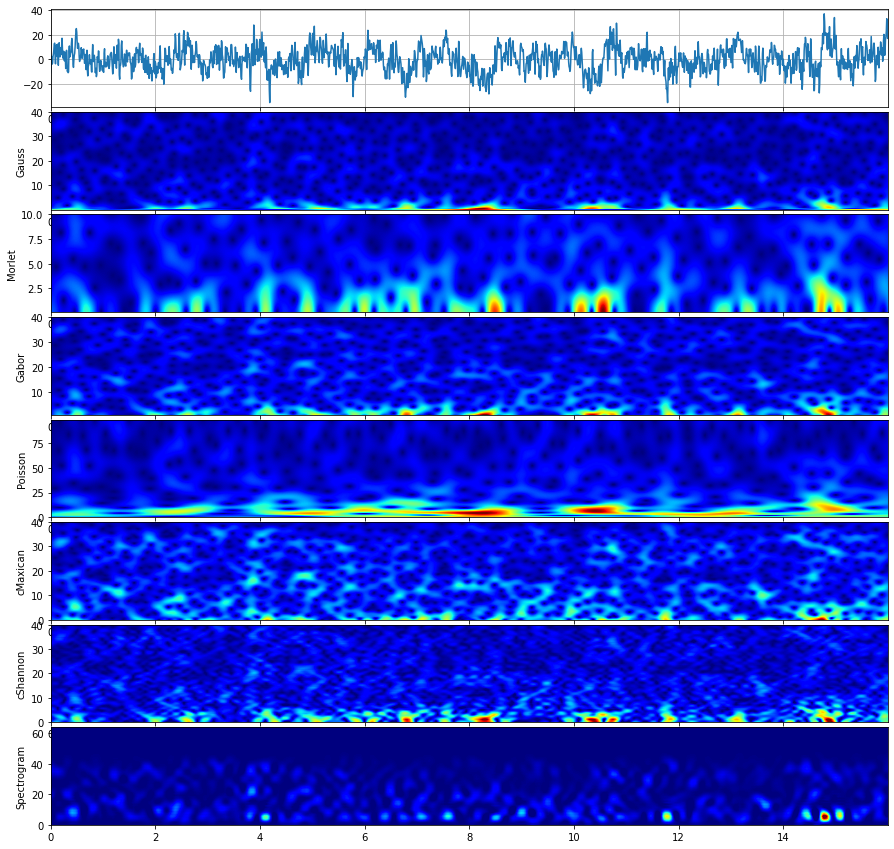

In [8]:
sp.cwt.compare_cwt_example(x,t,fs=fs)

## Gauss wavelet

### Default parameter setting

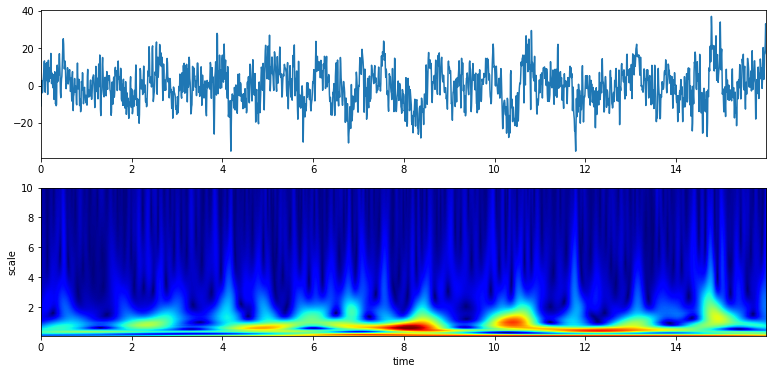

In [9]:
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Gauss',PlotPSD=True)

In [10]:
XW.shape, S.shape

((100, 2048), (100,))

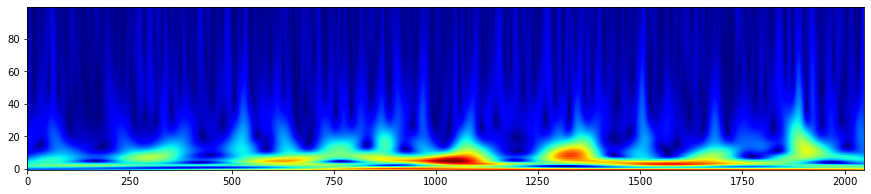

In [11]:
plt.figure(figsize=(15,3))
plt.imshow(np.abs(XW),aspect='auto',origin='lower',cmap='jet',interpolation='sinc')
plt.show()

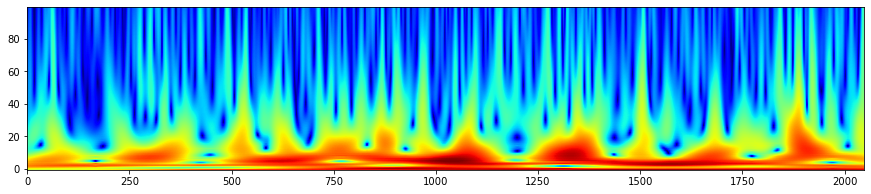

In [12]:
plt.figure(figsize=(15,3))
plt.imshow(np.log10(np.abs(XW)+0.2),aspect='auto',origin='lower',cmap='jet',interpolation='sinc')
plt.show()

### with custom setting

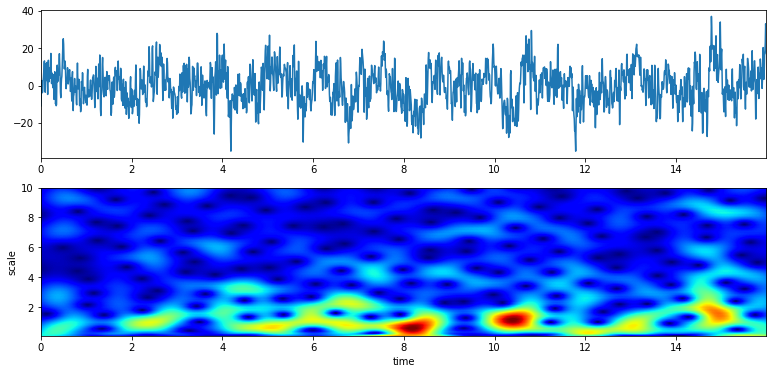

In [14]:
f0 = np.linspace(0.1,10,100)
Q  = np.linspace(0.1,5,100)
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Gauss',PlotPSD=True,f0=f0,Q=Q)

### Show wavelets in time and frequency domain

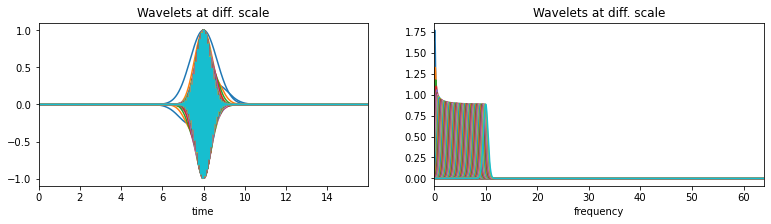

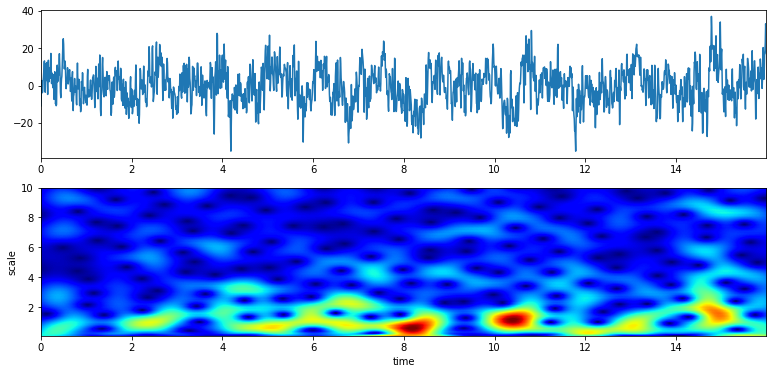

In [15]:
f0 = np.linspace(0.1,10,100)
Q  = np.linspace(0.1,5,100)
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Gauss',PlotPSD=True,PlotW=True,f0=f0,Q=Q)

##  Other wavelets

Morlet wavelet


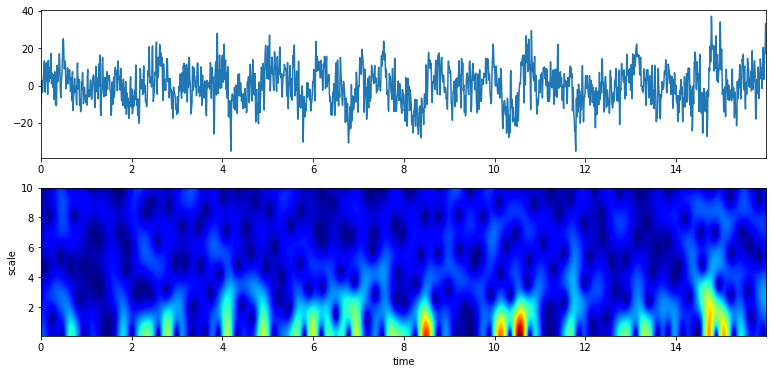

Gabor wavelet


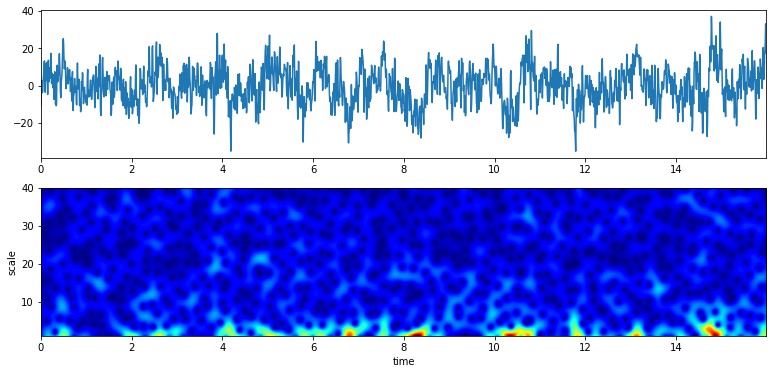

Poisson wavelet


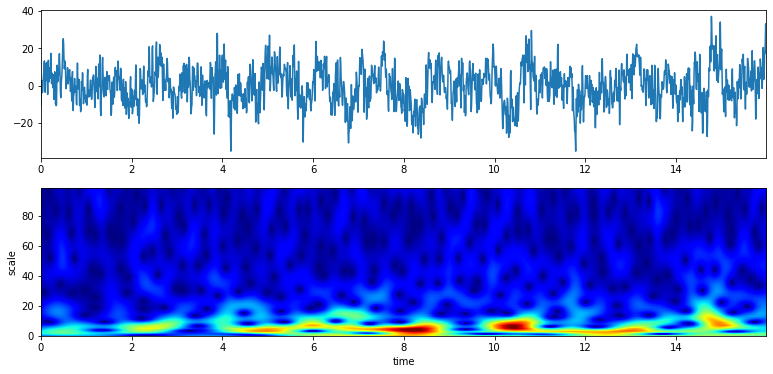

Complex Maxican wavelet


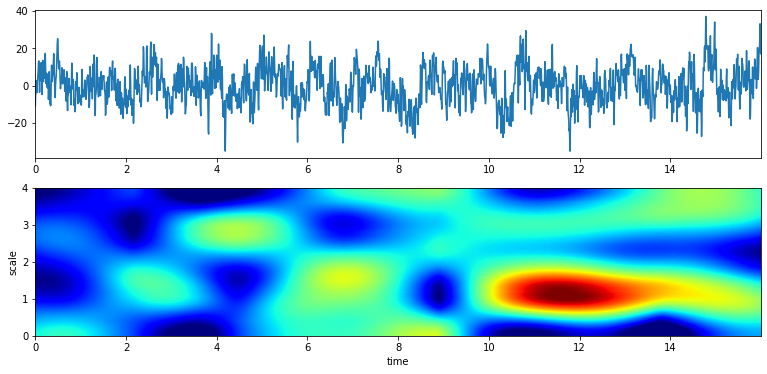

Complex Shannon wavelet


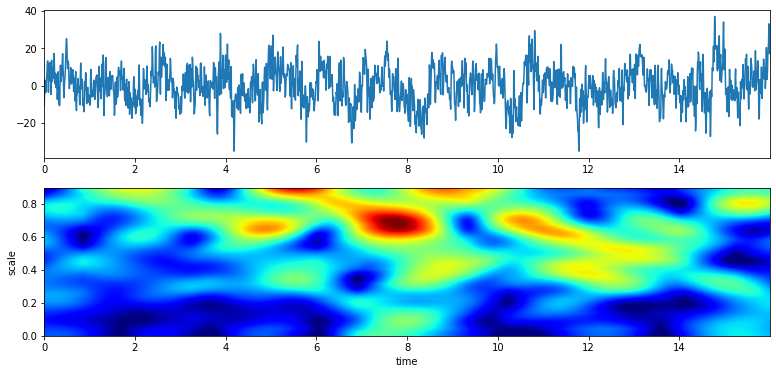

In [16]:
print('Morlet wavelet')
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Morlet',PlotPSD=True,)

print('Gabor wavelet')
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Gabor',PlotPSD=True,)

print('Poisson wavelet')
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='Poisson',PlotPSD=True,)

print('Complex Maxican wavelet')
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='cMaxican',PlotPSD=True,)

print('Complex Shannon wavelet')
XW,S = sp.cwt.ScalogramCWT(x,t,fs=fs,wType='cShannon',PlotPSD=True,)

## Documentation

In [17]:
help(sp.cwt.ScalogramCWT)

Help on function ScalogramCWT in module cwt:

ScalogramCWT(x, t, wType='Gauss', fs=128, PlotPSD=False, PlotW=False, fftMeth=True, interpolation='sinc', **Parameters)
    Compute scalogram using Continues Wavelet Transform for wavelet type (wType) and given scale range
    
    Parameters
    ----------
    
    x: array-like, input signal,
    t: array-like, time array corresponding to x, same length as x
    fs: sampling rate
    PlotPSD: bool, if True, plot Scalogram
    PlotW :  bool, if True, plot wavelets in time and frequecy with different scalling version
    fftMeth: if True, FFT method is used, else convolution method is used. FFT method is faster.
    interpolation: str, or None, interpolation while ploting Scalogram.
    
    Parameters for different wavelet functions
    --------
    Common Parameters for all the Wavelet functions
    
    f : array of frequency range to be analysed, e.g. np.linspace(-10,10,2*N-1), where N = len(x)
      : if None, frequency range of signal